#### Aaron Stopher

Exploration of SHAP visualisations with Keras Multi Layered Perceptron (MLP), Classifiers, and Regresors using seaborn datasets.

## SHAP vizualisations cause issues please read instructions before running!

To run the notebook succesfully follow the steps below:
1. Make sure you are not running a dark theme SHAP plots do NOT have default white background
2. Scroll to block (near bottom) with comment `RUN THIS BLOCK AFTER KERNAL RESET`
3. Select execute above cells
4. Wait for execution
5. Reset your ipython kernel
6. Scroll to block (near bottom) with comment `RUN THIS BLOCK AFTER KERNAL RESET`
7. Select execute cell and below

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import hard_sigmoid
from keras.utils import to_categorical 

from scikeras.wrappers import KerasRegressor
from sklearn.neural_network import MLPRegressor

import shap
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
shap.initjs() # init the JS visualization code for SHAP

Implementing a Multi Layered Perceptron Regressor using sklearn on seaborn diabetes dataset

In [87]:
# MLP
sklearn_dataset = datasets.load_diabetes() # load sklearn dataset
cols = sklearn_dataset['feature_names'] # set a list of columns
X = pd.DataFrame(sklearn_dataset['data'], columns=cols) # create feature DataFrame
y = sklearn_dataset['target'] # create target series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # split

perceptron_model = MLPRegressor(hidden_layer_sizes= (50,50,50), max_iter = 10000, activation = "relu", random_state=0) # define NN
perceptron_model = perceptron_model.fit(X_train, y_train) # fit model
preds = perceptron_model.predict(X_test) # predictions

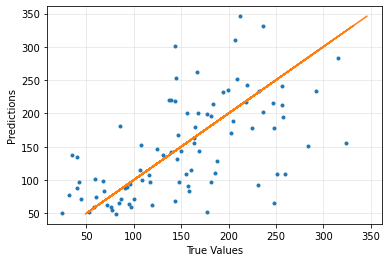

RMSE = 65.7


In [88]:
# Best Fit Plot & RMSE
plt.plot(preds, y_test, '.')
plt.plot(y_test, y_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.grid(alpha = .3)
plt.show()

RMSE = round(np.sqrt(mean_squared_error(preds, y_test)),2)
print(f'RMSE = {RMSE}')

In [89]:
# Discriptive model statistics
print(f'model RMSE = {RMSE}\n') # models RMSE

print(f'y_test mean = {y_test.mean()}') # test target mean
print(f'preds mean = {preds.mean()}') # prediction mean

pred_distance = round(np.abs(y_test.mean() - preds.mean()),2) # prediction distance
ppe = round((pred_distance)/y_test.mean()*100,4) # prediction percent error

print(f'pred distance = {pred_distance}')
print(f'prediction perecent error = {ppe}%') # within x percent of predicting actual mean

model RMSE = 65.7

y_test mean = 147.20224719101122
preds mean = 152.73244335158458
pred distance = 5.53
prediction perecent error = 3.7567%


Prepare seaborn titanic dataset

In [90]:
# Keras 
data = sns.load_dataset('titanic')

#### CLEAN ####

# Create age set without NA
data_clean_age = data.loc[data['age'].isna() == False]

# Create median age per class
age_first = data_clean_age.age.loc[data_clean_age.pclass == 1].median()
age_second = data_clean_age.age.loc[data_clean_age.pclass == 2].median()
age_third = data_clean_age.age.loc[data_clean_age.pclass == 3].median()

# Create copy of data and drop uneeded columns
clean_data = data.copy()
clean_data.drop(['deck',"alive",'embarked','class'], axis=1,inplace=True)

# Impute age per class
print(f'age NA Count before impute = {clean_data["age"].isna().sum()}')
clean_data.loc[(clean_data.age.isna()) & (clean_data.pclass.isin([1])),['age']] = age_first
clean_data.loc[(clean_data.age.isna()) & (clean_data.pclass.isin([2])),['age']] = age_second
clean_data.loc[(clean_data.age.isna()) & (clean_data.pclass.isin([3])),['age']] = age_third
print(f'age NA Count after impute = {clean_data["age"].isna().sum()}\n')

# Remove remaining NA rows
print(f'NA count before = {clean_data.isna().sum().sum()}')
clean_data.dropna(inplace=True)
print(f'NA count after = {clean_data.isna().sum().sum()}')

# Assign y Series
y = clean_data['survived']

# Dummy catagorical features and assign X dataframe
cat_cols = ["pclass", "sex", "who", "adult_male", "embark_town", "alone"]
X = pd.concat([clean_data.drop(columns=['survived']), pd.get_dummies(clean_data.drop(columns=['survived'])[cat_cols],columns=cat_cols)],axis=1).drop(cat_cols, axis=1)

age NA Count before impute = 177
age NA Count after impute = 0

NA count before = 2
NA count after = 0


## Keras Models

Implementing a Keras Sequential NN Classifier on clean dataset

(622, 19)
(267, 19)
2
Train on 497 samples, validate on 125 samples
Epoch 1/20
 32/497 [>.............................] - ETA: 1s - loss: 1.3894 - accuracy: 0.3438

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


497/497 [==============================] - 1s 1ms/sample - loss: 0.8248 - accuracy: 0.6419 - val_loss: 0.6420 - val_accuracy: 0.6800
Epoch 2/20
497/497 [==============================] - 0s 78us/sample - loss: 0.6366 - accuracy: 0.7324 - val_loss: 0.7900 - val_accuracy: 0.6400
Epoch 3/20
497/497 [==============================] - 0s 70us/sample - loss: 0.6376 - accuracy: 0.7264 - val_loss: 0.6657 - val_accuracy: 0.6880
Epoch 4/20
497/497 [==============================] - 0s 78us/sample - loss: 0.5184 - accuracy: 0.7666 - val_loss: 0.6478 - val_accuracy: 0.7040
Epoch 5/20
497/497 [==============================] - 0s 77us/sample - loss: 0.4660 - accuracy: 0.8028 - val_loss: 0.5606 - val_accuracy: 0.7280
Epoch 6/20
497/497 [==============================] - 0s 74us/sample - loss: 0.4402 - accuracy: 0.8290 - val_loss: 0.5527 - val_accuracy: 0.7440
Epoch 7/20
497/497 [==============================] - 0s 81us/sample - loss: 0.4856 - accuracy: 0.7988 - val_loss: 0.6405 - val_accuracy: 0.72

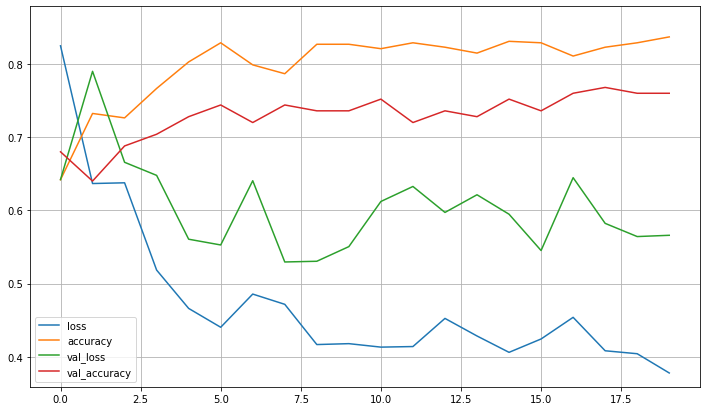

In [91]:
# Activation = (Softmax) + Optimizer = (adam - SGD)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# collect and display shape information
count_classes = y_test.shape[1]
print(count_classes)

# define Sequential NN model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[-1],)))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax')) # shape = 2; since binary outcome was one hot encoded


# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# define a fit with a validation split
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# output results and collect min/max for plot scoping
results = pd.DataFrame(history.history)
results.plot(figsize=(12,7))
r_min = results.min().min()
r_max = results.max().max()
plt.grid()
plt.gca().set_ylim(r_min-(r_min*.05),r_max+(r_max*.05)) # set min/max range to true min/max +/- 5%
plt.show()

In [92]:
# predict on train then display accuracy & error
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0) 
print(f'Accuracy on training data: {round(scores[1]*100,2)}% \n Error on training data: {round((1 - scores[1])*100,2)}%') 

# predict on test then display accuracy & error
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy on test data: {round(scores2[1]*100,2)}% \n Error on test data: {round((1 - scores2[1])*100,2)}%') 

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Accuracy on training data: 82.64% 
 Error on training data: 17.36%
Accuracy on test data: 82.4% 
 Error on test data: 17.6%


In [ ]:
# define SHAP sample size and explainer objects then define shap values object
sample_data = shap.sample(X_test, 1000)
explainer = shap.DeepExplainer(model, np.array(sample_data))
shap_values = explainer.shap_values(np.array(sample_data))

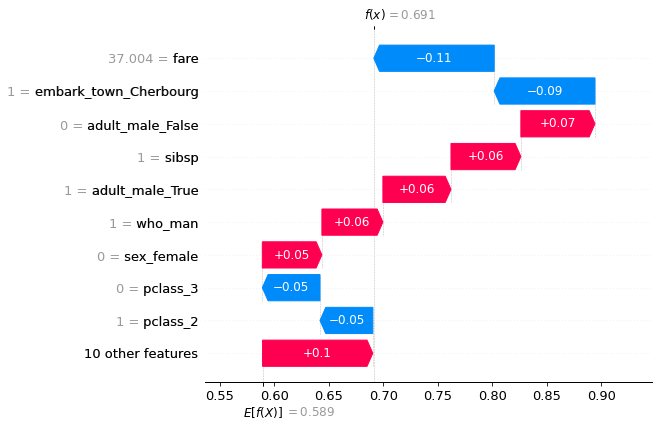

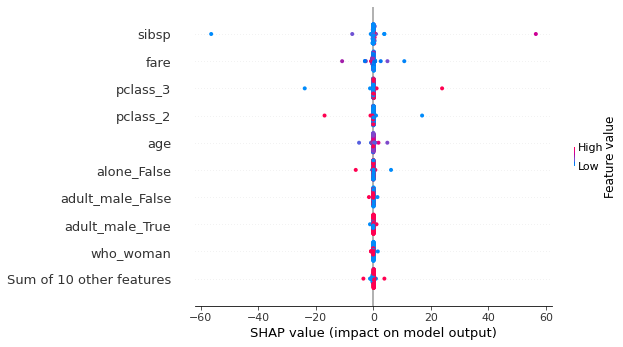

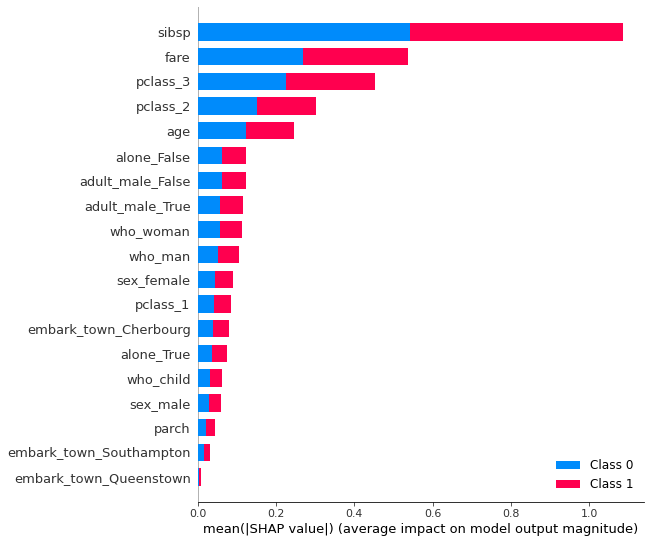

In [94]:
# collect base_values for waterfall fix
values = shap_values[0]
base_values = [explainer.expected_value[0]]*len(shap_values[0])

# create object to fix missing base values exception
tmp = shap.Explanation(values = np.array(values, dtype=np.float32),
                       base_values = np.array(base_values, dtype=np.float32),
                       data=np.array(sample_data),
                       feature_names=sample_data.columns)

# display waterfall, beeswarm, and summary plot for Keras titanic Model
shap.plots.waterfall(tmp[0])
shap.plots.beeswarm(tmp)
shap.summary_plot(shap_values,sample_data)

In [95]:
# display force plot of last item in the test set
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[-1])

In [96]:
# display force plot of whole explainer object & all related shap values
shap.force_plot(explainer.expected_value[0], shap_values[0])

(622, 19)
(267, 19)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 19)                0         
                                                                 
 dense_52 (Dense)            (None, 64)                1280      
                                                                 
 dense_53 (Dense)            (None, 32)                2080      
                                                                 
 dense_54 (Dense)            (None, 16)                528       
                                                                 
 dense_55 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,905
Trainable params: 3,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 497 samples, vali

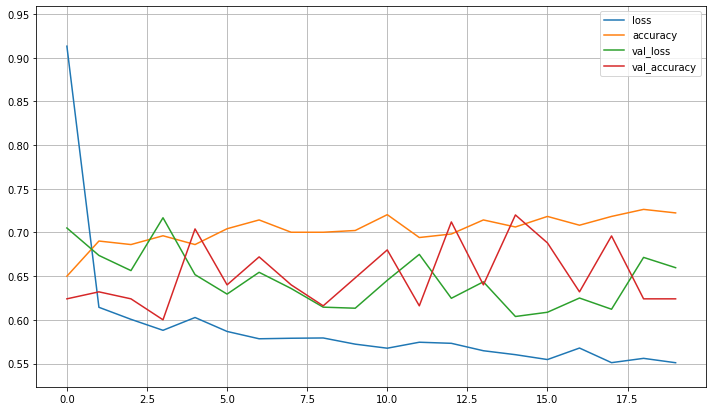

In [97]:
# Activation = (sigmoid) + Optimizer = (SGD)

# split and display shape information
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

# define Sequential NN model
model = keras.models.Sequential()
model.add(Flatten(input_shape=(X_train.shape[-1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# summarize and compile the model with options
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)
model.evaluate(X_test, y_test)

# output results and collect min/max for plot scoping
results = pd.DataFrame(history.history)
results.plot(figsize=(12,7))
r_min = results.min().min()
r_max = results.max().max()
plt.grid()
plt.gca().set_ylim(r_min-(r_min*.05),r_max+(r_max*.05)) # set min/max range to true min/max +/- 5%
plt.show()

In [98]:
# predict on train then display accuracy & error
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0) 
print(f'Accuracy on training data: {round(scores[1]*100,2)}% \n Error on training data: {round((1 - scores[1])*100,2)}%') 

# predict on test then display accuracy & error
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy on test data: {round(scores2[1]*100,2)}% \n Error on test data: {round((1 - scores2[1])*100,2)}%') 


Accuracy on training data: 65.11% 
 Error on training data: 34.89%
Accuracy on test data: 64.42% 
 Error on test data: 35.58%


Implementing a Keras Sequential NN Regressor on an example dataset from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

In [99]:
# Prepare data

# load data into dataframe
bikeshare_data = pd.read_csv('bike_share_hour.csv', index_col=0)

# convert the categorical columns to pandas "category" type
cat_list = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']
bikeshare_data[cat_list] = bikeshare_data[cat_list].apply(lambda x: x.astype("category"))

# Scale the numerical features using `StandardScaler()`, and replace the original columns in your dataframe. 
scaled_features = StandardScaler().fit_transform(bikeshare_data[bikeshare_data.drop(columns = 'cnt').select_dtypes(include=['int64','float64']).columns])

# reset the columns to the scaled version
bikeshare_data[bikeshare_data.drop(columns='cnt').select_dtypes(include=['int64','float64']).columns] = scaled_features

# Drop casual, registered, dteday, instant
bikeshare_data.drop(['casual','registered','dteday'], axis=1, inplace=True)

# reset index after above processing
bikeshare_data.reset_index(drop=True, inplace=True)

# split and display X_train shape
X_train, X_test, y_train, y_test = train_test_split(bikeshare_data.drop(columns=['cnt']), bikeshare_data['cnt'], test_size=0.20, random_state=42)
print(X_train.shape[-1])

12


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 12)                0         
                                                                 
 dense_56 (Dense)            (None, 300)               3900      
                                                                 
 dropout_6 (Dropout)         (None, 300)               0         
                                                                 
 dense_57 (Dense)            (None, 500)               150500    
                                                                 
 dropout_7 (Dropout)         (None, 500)               0         
                                                                 
 dense_58 (Dense)            (None, 300)               150300    
                                                                 
 dense_59 (Dense)            (None, 1)               

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


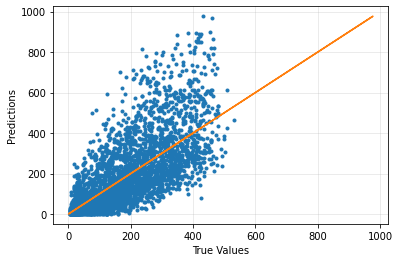

RMSE = 123.76


In [100]:
# Activation = (relu) + Optimizer = (adam - SGD) + Dropout = 0.5

# define Sequential NN model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[-1],)))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(300, activation='relu'))
model.add(Dense(1))

# Compile the model
print(model.summary())
model.compile(loss = "mean_squared_error", optimizer = "adam")

# define a fit with a validation split
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Best Fit Plot & RMSE
plt.plot(preds, y_test, '.')
plt.plot(y_test, y_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.grid(alpha = .3)
plt.show()

RMSE = round(np.sqrt(mean_squared_error(preds, y_test)),2)
print(f'RMSE = {RMSE}')

In [101]:
# Discriptive model statistics
print(f'model RMSE = {RMSE}\n') # model RMSE

print(f'y_test mean = {y_test.mean()}') # test target mean
print(f'preds mean = {preds.mean()}') # model prediction mean

pred_distance = round(np.abs(y_test.mean() - preds.mean()),2) # define prediction distance
ppe = round((pred_distance)/y_test.mean()*100,4) # define prediction percent error

print(f'pred distance = {pred_distance}')
print(f'prediction perecent error = {ppe}%') # within x percent of predicting actual mean

model RMSE = 123.76

y_test mean = 185.00747986191024
preds mean = 177.5181427001953
pred distance = 7.49
prediction perecent error = 4.0485%


In [102]:
pickle.dump(model, open('Keras_Reg_Model.pkl', 'wb')) # dump model into file for re-run

INFO:tensorflow:Assets written to: C:\Users\aaron\AppData\Local\Temp\tmpun57ts32\assets


In [103]:
# define SHAP sample size and explainer objects then define shap values object
sample_data = shap.sample(X_test, 1000)
explainer = shap.DeepExplainer(model, np.array(sample_data))
shap_values = explainer.shap_values(np.array(sample_data))

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


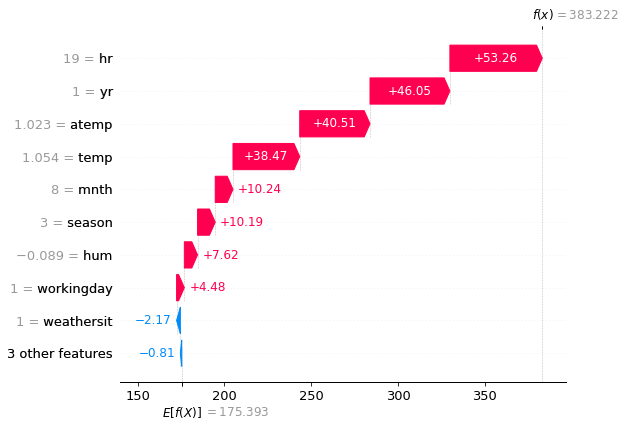

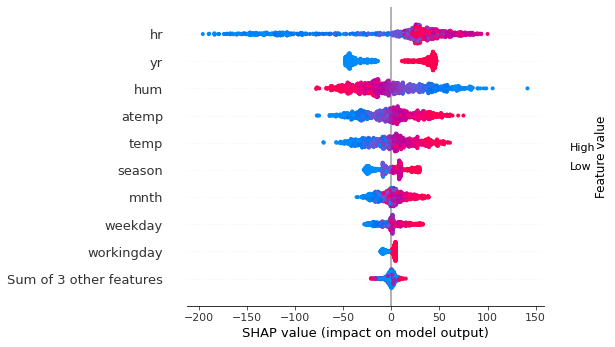

In [104]:
# collect base_values for waterfall fix
values = shap_values[0]
base_values = [explainer.expected_value[0]]*len(shap_values[0])

# create object to fix missing base values exception
tmp = shap.Explanation(values = np.array(values, dtype=np.float32),
                       base_values = np.array(base_values, dtype=np.float32),
                       data=np.array(sample_data),
                       feature_names=sample_data.columns)

# display waterfall and beeswarm plot for Keras bike share Model
shap.plots.waterfall(tmp[0])
shap.plots.beeswarm(tmp)

In [105]:
# display force plot of last item in the test set
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[-1])

In [106]:
# display force plot of whole explainer object & all related shap values
shap.force_plot(explainer.expected_value[0], shap_values[0])

Implement grid search for bike share Keras regressor model

In [1]:
###########################################
#### RUN THIS BLOCK AFTER KERNAL RESET ####
###########################################

#### IMPORTS ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import hard_sigmoid
from keras.utils import to_categorical 

from scikeras.wrappers import KerasRegressor
from sklearn.neural_network import MLPRegressor

#### LOAD DATA ####
bikeshare_data = pd.read_csv('bike_share_hour.csv', index_col=0)

# convert the categorical columns to pandas "category" type
cat_list = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit'] 
bikeshare_data[cat_list] = bikeshare_data[cat_list].apply(lambda x: x.astype("category"))

# Scale the numerical features using `StandardScaler()`, and replace the original columns in your dataframe. 
scaled_features = StandardScaler().fit_transform(bikeshare_data[bikeshare_data.drop(columns = 'cnt').select_dtypes(include=['int64','float64']).columns])
bikeshare_data[bikeshare_data.drop(columns='cnt').select_dtypes(include=['int64','float64']).columns] = scaled_features # reset the columns to the scaled version
bikeshare_data.drop(['casual','registered','dteday'], axis=1, inplace=True) # Drop casual, registered, dteday, instant
bikeshare_data.reset_index(drop=True, inplace=True) # reset index after above processing

X_train, X_test, y_train, y_test = train_test_split(bikeshare_data.drop(columns=['cnt']), bikeshare_data['cnt'], test_size=0.20, random_state=42)

#### LOAD PICKLE MODEL ####
model = pickle.load(open('Keras_Reg_Model.pkl', 'rb'))

#### GRID SEARCH ####
print(model.summary()) # display model summary

# compile model
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train)

# create a KarasRegressor object with params
scikeras_regressor = KerasRegressor(model=model,
                                    optimizer="adam",
                                    loss='mean_squared_error',
                                    batch_size=10,
                                    epochs=10,
                                    verbose=0)
# define grid search params
batch_size = [25]
epochs = [5]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(batch_size=batch_size,epochs=epochs,optimizer=optimizer)

# perform grid search
grid_search = GridSearchCV(estimator = scikeras_regressor, param_grid = param_grid)

# fit grid search model on training data
grid_model = grid_search.fit(X_train, y_train)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 12)                0         
                                                                 
 dense_56 (Dense)            (None, 300)               3900      
                                                                 
 dropout_6 (Dropout)         (None, 300)               0         
                                                                 
 dense_57 (Dense)            (None, 500)               150500    
                                                                 
 dropout_7 (Dropout)         (None, 500)               0         
                                                                 
 dense_58 (Dense)            (None, 300)               150300    
                                                                 
 dense_59 (Dense)            (None, 1)               

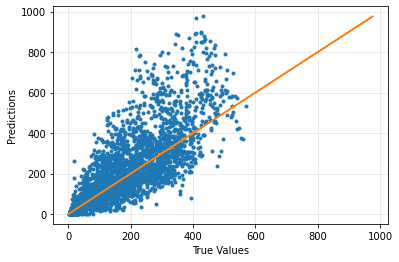

RMSE = 108.52


In [2]:
# predict using our grid model
preds = grid_model.predict(X_test)

# Best Fit Plot & RMSE
plt.plot(preds, y_test, '.')
plt.plot(y_test, y_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.grid(alpha = .3)
plt.show()

RMSE = round(np.sqrt(mean_squared_error(preds, y_test)),2)
print(f'RMSE = {RMSE}')

In [3]:
# Discriptive model statistics
print(f'model RMSE = {RMSE}\n') # model RMSE

print(f'y_test mean = {y_test.mean()}') # test target mean
print(f'preds mean = {preds.mean()}') # model prediction mean

pred_distance = round(np.abs(y_test.mean() - preds.mean()),2) # define prediction distance
ppe = round((pred_distance)/y_test.mean()*100,4) # define prediction percent error

print(f'pred distance = {pred_distance}')
print(f'prediction perecent error = {ppe}%') # within x percent of predicting actual mean

model RMSE = 108.52

y_test mean = 185.00747986191024
preds mean = 156.6868896484375
pred distance = 28.32
prediction perecent error = 15.3075%
